***ANA500 Alzehmer's Predition***

In [2]:
# Importlibraries
import pandas as pd

In [3]:
# Load the dataset
file_path = 'anaconda_projects/db/alzheimers_prediction_dataset.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer's Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


***Clean and Prepare Dataset***

In [6]:
# Display basic information about the dataset
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 

In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer's           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Li

In [8]:
# Check for duplicate records
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [9]:
# Display unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


Unique Values in Categorical Columns:
Country: ['Spain' 'Argentina' 'South Africa' 'China' 'Sweden' 'South Korea'
 'Germany' 'UK' 'Canada' 'India' 'Italy' 'USA' 'Russia' 'Japan'
 'Australia' 'France' 'Norway' 'Saudi Arabia' 'Mexico' 'Brazil']
Gender: ['Male' 'Female']
Physical Activity Level: ['Medium' 'High' 'Low']
Smoking Status: ['Never' 'Former' 'Current']
Alcohol Consumption: ['Occasionally' 'Never' 'Regularly']
Diabetes: ['No' 'Yes']
Hypertension: ['No' 'Yes']
Cholesterol Level: ['Normal' 'High']
Family History of Alzheimer's: ['No' 'Yes']
Depression Level: ['Low' 'High' 'Medium']
Sleep Quality: ['Poor' 'Good' 'Average']
Dietary Habits: ['Healthy' 'Average' 'Unhealthy']
Air Pollution Exposure: ['High' 'Medium' 'Low']
Employment Status: ['Retired' 'Unemployed' 'Employed']
Marital Status: ['Single' 'Widowed' 'Married']
Genetic Risk Factor (APOE-ε4 allele): ['No' 'Yes']
Social Engagement Level: ['Low' 'High' 'Medium']
Income Level: ['Medium' 'Low' 'High']
Stress Levels: ['High' 'Lo

In [10]:
# Convert binary categorical columns to numerical (0 for 'No', 1 for 'Yes')
binary_columns = ['Diabetes', 'Hypertension', 'Cholesterol Level', 
                  "Family History of Alzheimer's", 'Genetic Risk Factor (APOE-ε4 allele)', 
                  "Alzheimer's Diagnosis", 'Gender']

binary_mapping = {'No': 0, 'Yes': 1, 'Normal': 0, 'High': 1, 'Male': 0, 'Female': 1}

# Apply replacement and explicitly infer types
df[binary_columns] = df[binary_columns].replace(binary_mapping).infer_objects(copy=False)

C:\Users\rdarn\AppData\Local\Temp\ipykernel_15940\2440899378.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace(binary_mapping).infer_objects(copy=False)


In [11]:
# Display summary statistics of numerical columns
print("\nSummary Statistics of Numerical Columns:")
print(df.describe())


Summary Statistics of Numerical Columns:
                Age        Gender  Education Level           BMI  \
count  74283.000000  74283.000000     74283.000000  74283.000000   
mean      71.964703      0.501447         9.487514     26.780639   
std       12.980748      0.500001         5.757020      4.764679   
min       50.000000      0.000000         0.000000     18.500000   
25%       61.000000      0.000000         4.000000     22.700000   
50%       72.000000      1.000000         9.000000     26.800000   
75%       83.000000      1.000000        14.000000     30.900000   
max       94.000000      1.000000        19.000000     35.000000   

           Diabetes  Hypertension  Cholesterol Level  \
count  74283.000000  74283.000000       74283.000000   
mean       0.198646      0.298171           0.300338   
std        0.398983      0.457458           0.458408   
min        0.000000      0.000000           0.000000   
25%        0.000000      0.000000           0.000000   
50%      

In [12]:
# Save cleaned dataset (optional)
df.to_csv("cleaned_alzheimers_dataset.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_alzheimers_dataset.csv'")


Cleaned dataset saved as 'cleaned_alzheimers_dataset.csv'


***Visual Analysis***

In [14]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the cleaned dataset
file_path = "cleaned_alzheimers_dataset.csv"  # Ensure you have the cleaned dataset
df = pd.read_csv(file_path)

In [16]:
# Set style for plots
sns.set(style="whitegrid")

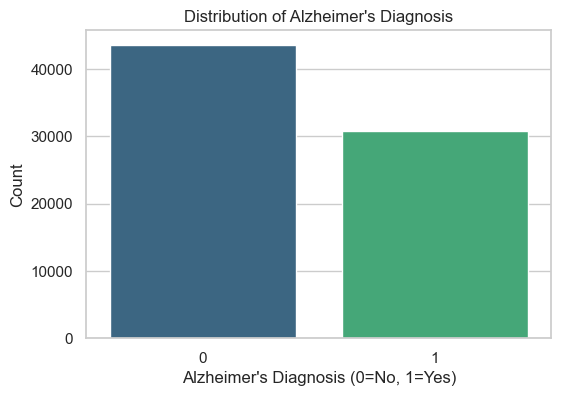

In [17]:
# 1. Bar chart - Alzheimer's Diagnosis distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x="Alzheimer's Diagnosis", data=df, hue="Alzheimer's Diagnosis", palette="viridis", legend=False)
plt.title("Distribution of Alzheimer's Diagnosis")
plt.xlabel("Alzheimer's Diagnosis (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

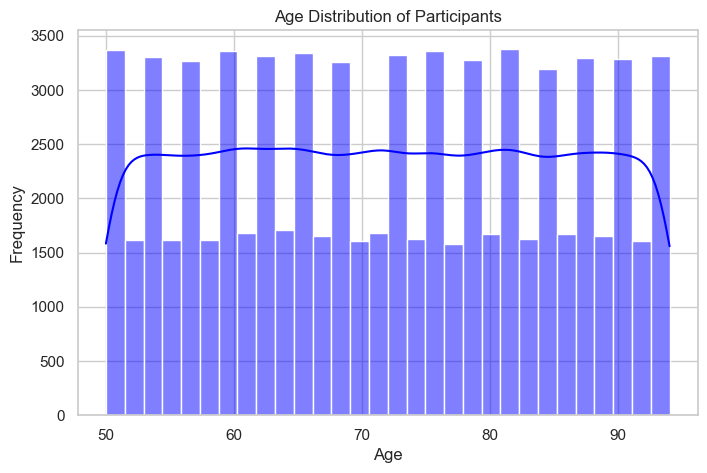

In [18]:
# 2. Histogram - Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color="blue")
plt.title("Age Distribution of Participants")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


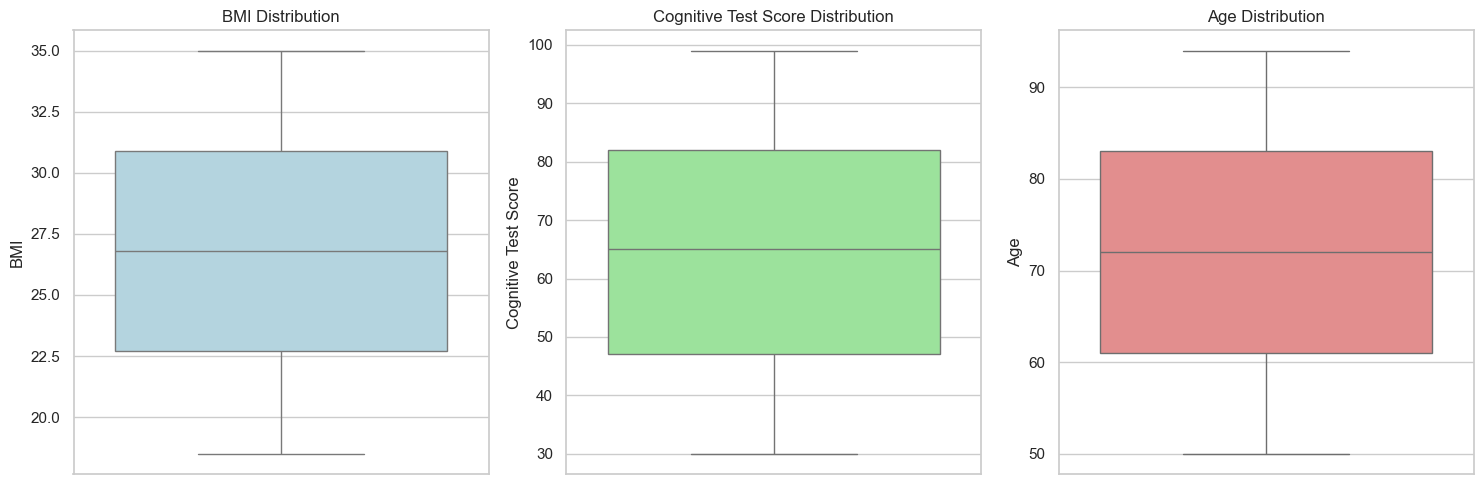

In [19]:
# 3. Boxplots for Outlier Detection in BMI, Cognitive Test Score, and Age
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y=df["BMI"], ax=axes[0], color="lightblue")
axes[0].set_title("BMI Distribution")

sns.boxplot(y=df["Cognitive Test Score"], ax=axes[1], color="lightgreen")
axes[1].set_title("Cognitive Test Score Distribution")

sns.boxplot(y=df["Age"], ax=axes[2], color="lightcoral")
axes[2].set_title("Age Distribution")

plt.tight_layout()
plt.show()

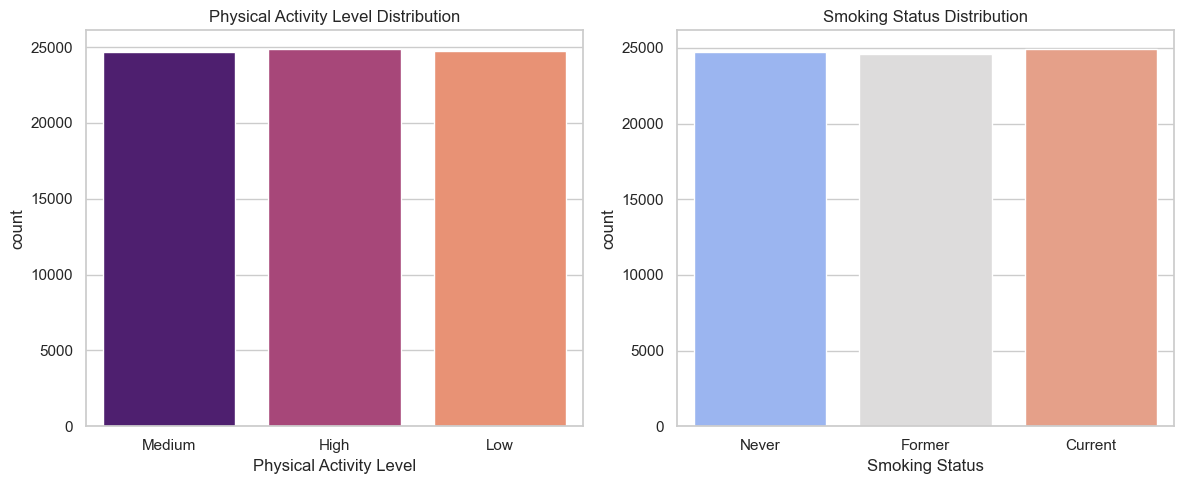

In [20]:
# 4. Bar charts for categorical variables - Physical Activity and Smoking Status
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Fix for Physical Activity Level countplot
sns.countplot(x="Physical Activity Level", hue="Physical Activity Level", data=df, ax=axes[0], palette="magma", legend=False)
axes[0].set_title("Physical Activity Level Distribution")

# Fix for Smoking Status countplot
sns.countplot(x="Smoking Status", hue="Smoking Status", data=df, ax=axes[1], palette="coolwarm", legend=False)
axes[1].set_title("Smoking Status Distribution")

plt.tight_layout()
plt.show()

# Machine Learning

***1.Load and Clean the Data.***

In [23]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
# Load the dataset
file_path = "anaconda_projects/db/alzheimers_prediction_dataset.csv" 
df = pd.read_csv(file_path)

# Display the first few rows to understand the data
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer's Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [25]:
# Standardize column names (replace spaces with underscores & remove special characters)
df.columns = df.columns.str.replace(" ", "_").str.replace("'", "")

In [26]:
# Check for missing values and drop or fill accordingly
df = df.dropna()  # Drop rows with missing values (Modify strategy if necessary)

In [27]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['Country', 'Gender', 'Physical_Activity_Level', 'Smoking_Status',
       'Alcohol_Consumption', 'Diabetes', 'Hypertension', 'Cholesterol_Level',
       'Family_History_of_Alzheimers', 'Depression_Level', 'Sleep_Quality',
       'Dietary_Habits', 'Air_Pollution_Exposure', 'Employment_Status',
       'Marital_Status', 'Genetic_Risk_Factor_(APOE-ε4_allele)',
       'Social_Engagement_Level', 'Income_Level', 'Stress_Levels',
       'Urban_vs_Rural_Living', 'Alzheimers_Diagnosis'],
      dtype='object')


In [28]:
# Encode categorical variables using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders in case needed for decoding

In [29]:
# Display first few rows after encoding
df.head()

,Country,Age,Gender,Education_Level,BMI,Physical_Activity_Level,Smoking_Status,Alcohol_Consumption,Diabetes,Hypertension,...,Dietary_Habits,Air_Pollution_Exposure,Employment_Status,Marital_Status,Genetic_Risk_Factor_(APOE-ε4_allele),Social_Engagement_Level,Income_Level,Stress_Levels,Urban_vs_Rural_Living,Alzheimers_Diagnosis
0,16,90,1,1,33.0,2,2,1,0,0,...,1,0,1,1,0,1,2,0,1,0
1,0,72,1,7,29.9,2,1,0,0,0,...,1,2,2,2,0,0,1,0,1,0
2,14,86,0,19,22.9,0,0,1,0,1,...,0,2,0,1,0,1,2,0,0,0
3,4,53,1,17,31.2,1,2,2,1,0,...,1,2,1,1,0,0,2,1,0,0
4,17,58,0,3,30.0,0,1,0,1,0,...,2,0,0,0,0,1,2,0,0,0


***2. Split Data and Apply Scaling***

In [31]:
# Define the target variable
target_column = "Alzheimers_Diagnosis"  # Ensure this matches the column name in df

In [32]:
# Separate features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]


In [33]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Check shapes to confirm successful processing
print("Training Data Shape:", X_train.shape, "Target:", y_train.shape)
print("Testing Data Shape:", X_test.shape, "Target:", y_test.shape)

Training Data Shape: (59426, 24) Target: (59426,)
Testing Data Shape: (14857, 24) Target: (14857,)


***3. Logistic Regression Model***

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76      8714
           1       0.67      0.60      0.63      6143

    accuracy                           0.71     14857
   macro avg       0.70      0.70      0.70     14857
weighted avg       0.71      0.71      0.71     14857



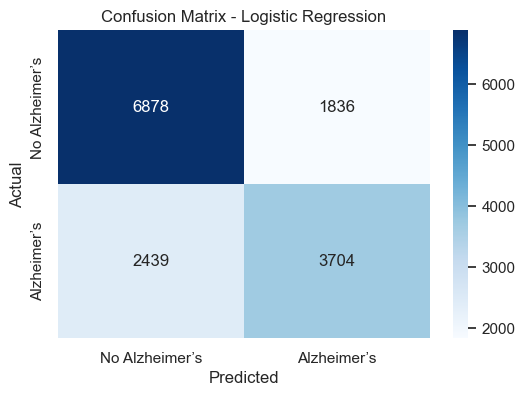

In [37]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

def plot_confusion_matrix(y_true, y_pred, model_name):
    """Generates a confusion matrix heatmap for model evaluation."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Alzheimer’s', 'Alzheimer’s'], yticklabels=['No Alzheimer’s', 'Alzheimer’s'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
# Train Logistic Regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Print classification report
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")

***4. Support Vector Machine (SVM)***

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      8714
           1       0.66      0.64      0.65      6143

    accuracy                           0.72     14857
   macro avg       0.71      0.70      0.71     14857
weighted avg       0.71      0.72      0.72     14857



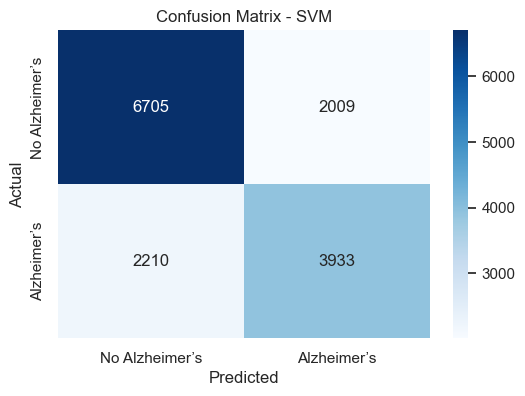

In [69]:
#  Support Vector Machine (SVM)
from sklearn.svm import SVC

# Training on the full data set was taking too long so reduced the training subset
# Train SVM on a smaller subset (e.g., 20% of training data)
X_small, _, y_small, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42, stratify=y_train)

# Train SVM on the reduced set
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_small, y_small)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Print classification report
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

***5. Random Forest Classifier***

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      8714
           1       0.67      0.65      0.66      6143

    accuracy                           0.72     14857
   macro avg       0.71      0.71      0.71     14857
weighted avg       0.72      0.72      0.72     14857



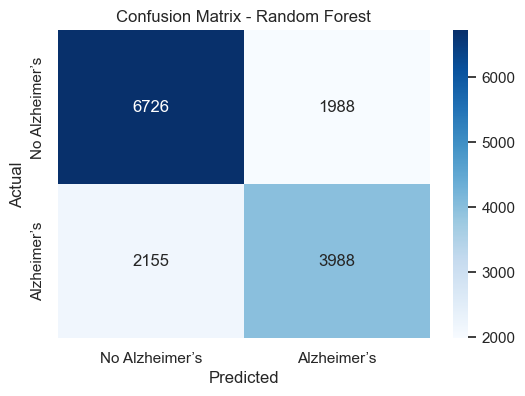

In [74]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Print classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")